# Version control: git

*Davide Gerosa (Milano-Bicocca)*

**Sources**: Michael Zingale at Stony Brook University: https://sbu-python-class.github.io

### Some definitions

- **git** is a file transfer protocol, much like http. 
- A **repository** is basically a directory, but a directory git can talk to 

## Why use version control?

When we develop code, we are going to be making lots of changes over
time.  And you will find yourself in the following situations:

* You swear that the code worked perfectly 6 months ago but today it doesn't and you can't figure out what changed.

* The code looks different than you remembered and you don't know why it changed.

* Your research group is all working on the same code* and you need to sync up with everyone's changes and make sure that no one breaks the code.

This is what version control does for us.

**Version control systems keep track of the history of changes to source code and allow multiple developers to all work on the same code base.**

In particular:

* Logs tell you what changes have been made to each file over time.

* You can request the source as it was at any time in the past.

* Multiple developers can all work on the same source code and share and synchronize changes.

  * Changes by different developers to the same file are merged.

  * If two developers changed the same part of a file, version control
    provides mechanisms to resolve conflicts.

* You can make a branch and work on new features without breaking the
  current working code, and when you are ready, merge those changes
  into the main version.


Even for a single developer, version control is a great asset.

**Common task**: you notice your code is giving different answers than you've
seen in the past. With version control, you can checkout an old copy when you know it
was working, and ask for the difference with the current code. 

Version control is not just for source code.  You can use it for
writing papers in LaTeX, course notes, etc. I developed this course entirely in git, I write my papers in git, share material for conferences, etc etc etc.


## Centralized vs. distributed version control

Broadly speaking, there are two different types of version control:
centralized and distributed.  We'll call the collection of code under
version control the *repository*.

### Centralized version control

Examples: [CVS](https://en.wikipedia.org/wiki/Concurrent_Versions_System) , [subversion](https://en.wikipedia.org/wiki/Apache_Subversion)

* A server holds the master copy of the source, stores the history, changes

* Each user communicates with the server:

  * "checkout" source
  * "commit" changes back to the source
  * request the log (history) of a file from the server
  * "diff" your local version with the version on the server

This is the older style of version control, and not widely used for new projects.


### Distributed version control

Examples: [git](https://en.wikipedia.org/wiki/Git), [mercurial](https://en.wikipedia.org/wiki/Mercurial)

* Everyone has a full-fledged repository with the entire history of the project.

* Commits, history, diff, logs, etc. are all local operations

* You can clone another person's repo and they can pull your changes
  back to their version

* Each copy is a backup of the whole history of the project

* Easy to "fork" -- just clone and go.


Any version control system is better than no version control. Git is by far the most popular tool right now, so we'll focus on that.

Git was written by [Linus Torvalds](https://en.wikipedia.org/wiki/Linus_Torvalds), the same guy who wrote the Linux kernel. Some say it's the ["most brilliant piece of software ever written"](https://dev.to/ben/git-is-one-of-the-most-brilliant-pieces-of-software-ever-written--2p4d).


Consider the figure below:


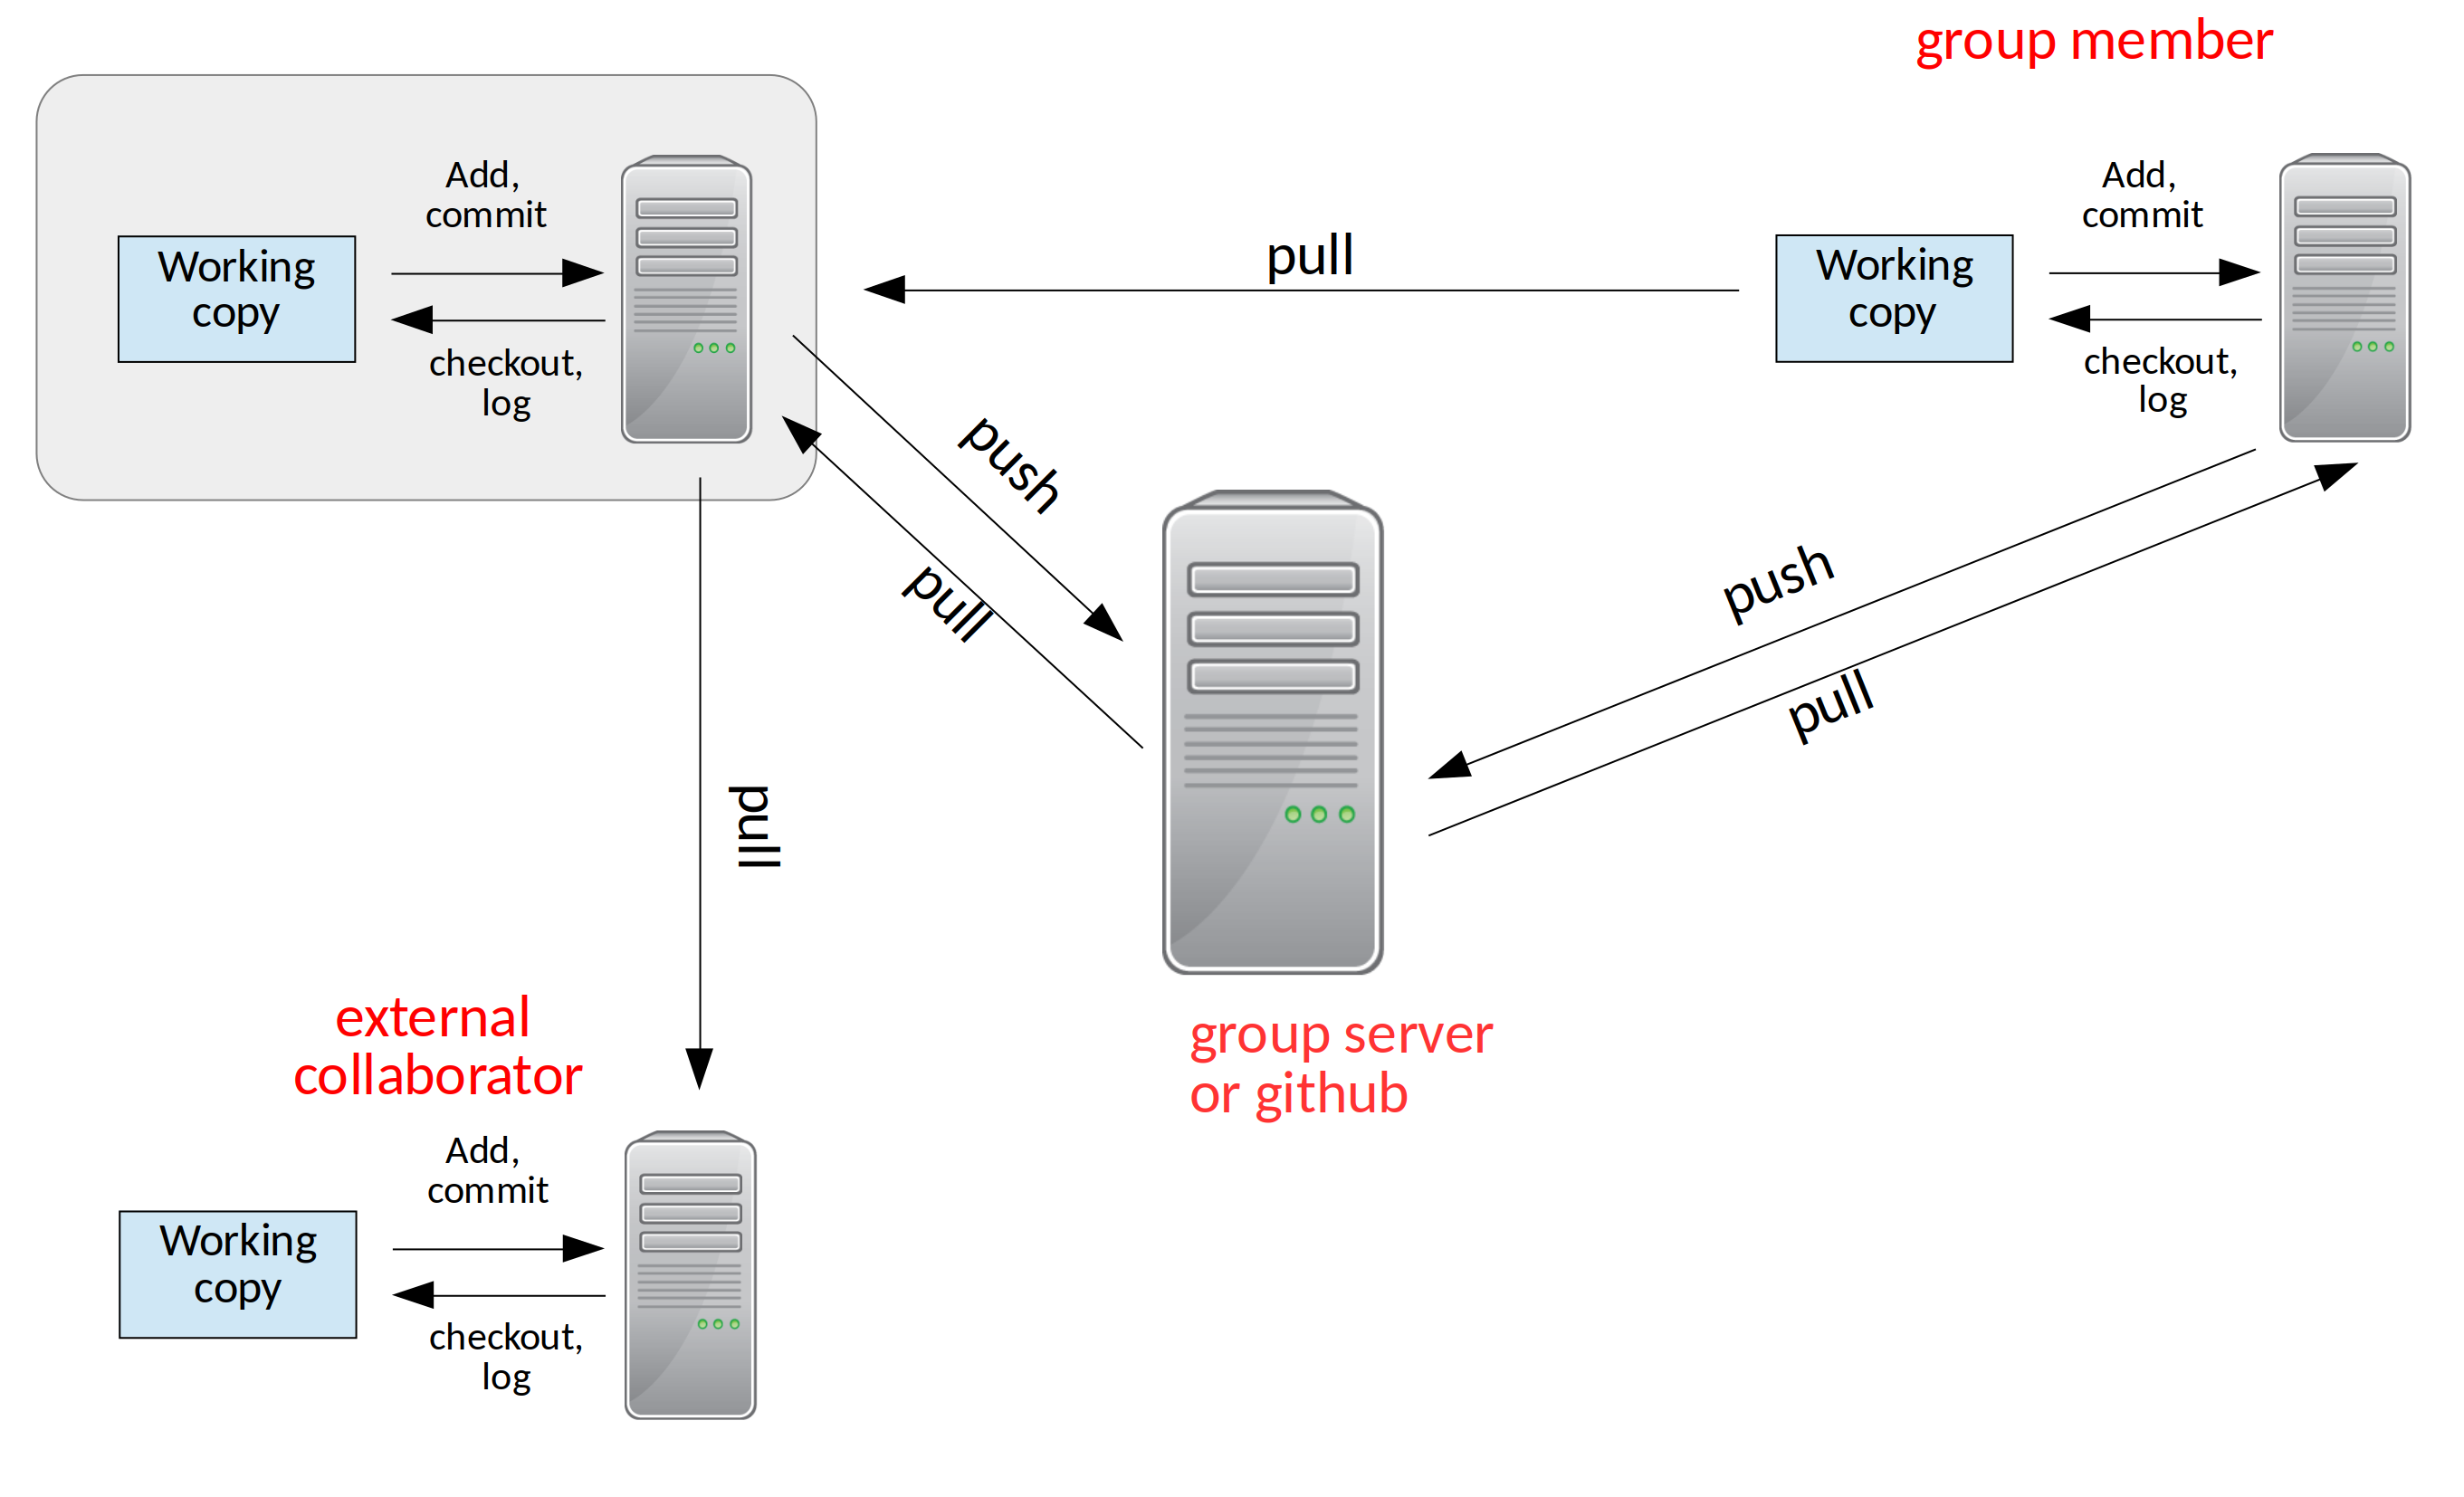

We see:

*  You in the upper left box interacting with your local computer.
   You can add changes to your repo and query the log, etc. all just
   using your own machine.

*  Your colleague in the upper right.  They can also interact with
   their own computer, using their own version of the repo.
   Now, imagine that they make a change that you want.  You can *pull*
   their version of the code into your repo, getting all of their
   changes.

*  Suppose you both want to efficiently share work as a group.  So you
   setup a group server and you can both synchronize your repo with
   that server by doing *pull* and *push*.
   This server provides a mechanism for everyone in the group to stay
   in sync. 

*  Imagine now that you have an external collaborator who doesn't have
   access to your server.  You can let them *pull* from your copy of
   the repo, without giving them permission to push changes back. They can then interact with their copy locally.

In practice, these days we use remote servers (much like you don't store your email on your laptopt anymore but use gmail); a popular choice is github.com, which is owned by Microsoft.

# A Git walkthrough

We'll do a walkthrough on git.

An alternate walkthrough is provided by the [Software
Carpentry](https://software-carpentry.org/) lesson [_Version Control
with Git_](https://swcarpentry.github.io/git-novice/index.html) and it
is highly suggested that you work through that on your own.

There are a few ways in which we can use git.  We'll start by assuming
that we are the only developer on a project and learn the basics and
then we'll see how to share what we've done locally and remotely using
GitHub.

You should create a [GitHub account](https://github.com) if you don't have one already.

<div class="alert alert-block alert-warning">
    
Pick a username that is professional and meaningful. For a computational physicist, consider your github profile as an extension of your CV. People **will** look at it when you apply for postdocs and/or data-science jobs.
</div>



Let's start by setting up our git environment:

```bash
git config --global user.name "name"
git config --global user.email "email"
```

Replace `name` with your name and `email` with your email. This information will be stored in a file called ``.gitconfig`` in your home directory.


Our goal here is to create a project (we'll call the directory
`project/`) and have git keep track of the files and changes to our
project.

1. First create a project directory with some basic content:

   ```bash
   mkdir project
   cd project
   echo "this is the start of my awesome new project" > README.md
   ```

2. Now let's tell git that we want to track this directory.

   ```bash
   git init
   ```

   If you do `ls` it will look like nothing has changed, but this
   command created a `.git/` sub-directory in our project, which you
   can see by doing:

   ```bash
   ls -a
   ```

3. At this point, we haven't told git about any of our files.  To tell git
   to track the file `README` we do:

   ```bash
   git add README.md
   git commit -m "my message"
   ```
   We can now ask git the state of our project with

   ```bash
   git status
   ```

   You should see something like:

   ```
   On branch main
   nothing to commit, working tree clean
   ```

   We can also see our log message:

   ```bash
   git log
   ```

   The output will look like:

   ```
    Author: Davide Gerosa <davide.gerosa@gmail.com>
    Date:   Thu Aug 24 16:04:24 2023 +0200

        my first change
   ```

   But should show your name, and the long string of numbers of
   letters after `commit` on the first line will be different.  We'll call
   the string the `hash`.  More on that later...

4. Now let's modify the file

   Open the file with whatever you want and add a second line of text. 
   
   Here's my file:

   ```bash
   cat README.md
   ```
   
   ```
    this is the start of my awesome new project
    Hello
   ```
  
   What does git think about our changes?

   ```bash
   git status
   ```
   
   you should see something like:

   ```
   On branch main
   Changes not staged for commit:
     (use "git add <file>..." to update what will be committed)
     (use "git checkout -- <file>..." to discard changes in working directory)

           modified:   README.md

   no changes added to commit (use "git add" and/or "git commit -a")
   ```
   
   This is telling you that you have local changes but you haven't yet told git to care about them.

   Let's `add` the changes:

   ```bash
   git add README
   ```

   and now `git status` will show something like:

   ```
   On branch main
   Changes to be committed:
     (use "git reset HEAD <file>..." to unstage)

           modified:   README
   ```

   **What is add really doing?**

   Git has a concept call the *staging area*.  When we ``add`` a
   file, git puts the changes into the staging area.  We can add
   multiple changes via separate ``git add`` invocations, and git
   will accumulate these in the staging area.

   Once we do `git commit`, git will record all of the
   changes that are staged into a "commit".
  
   
   To have git track these changes, we can now just do:

   ```bash
   git commit
   ```
   
   Notice that we didn't specify the file here -- all the changes that
   were staged were part of that commit.

   If we now do `git log`, we'll see that there is a second commit
   in our project, and it has a different unique hash:

   ```
    commit 6b683fd0c1c715998f3fb9fa8496bce80807e284 (HEAD -> main)
    Author: Davide Gerosa <davide.gerosa@gmail.com>
    Date:   Thu Aug 24 16:05:53 2023 +0200

        made some edits

    commit 1f3fd2d932f909025d8cda44ca1fd878158c6cb8
    Author: Davide Gerosa <davide.gerosa@gmail.com>
    Date:   Thu Aug 24 16:04:24 2023 +0200

        my first change
   ```

This repo now captures the state of our project.  Next we'll see how to use branches to
help our development process.


Summary
=======

We learned:

* `git init`

* `git add`

* `git commit`

* `git status`

* `git log`


# github

Github provides a web-based way to interact with git repositories.  At
its heart it hosts a bare repo that we can push-pull to/from, but it
also provides features to make it easier for users to request their
changes be incorporated. Projects as big as numpy are now developed via github. 


## Creating a repository on github

Let's start by creating a new git repository using github's web interface.  Start
on your github home page and click on the "+" icon and select "New repository":

Now we give the repository a name, say `ilovegit`.

Make sure that it defaults the repo to be public, which means anyone on the internet
can see the contents --- that's what we want here (but it doesn't need to be, say you're writing a paper)

Finally, check the box to add a `README` file -- this means that our repository will
not be empty initially.

Our project is now found at: ``https://github.com/ [username]/ [reponame]``,
where *username* is your Github username and *reponame* is the name of
the repository you just created.


## SSH interlude

Github works best if we communicate via [secure
shell](https://en.wikipedia.org/wiki/Secure_Shell) or *SSH*. There is some nice documentation describing key pairs in the Software
Carpentry [Create an SSH key pair](https://swcarpentry.github.io/git-novice/07-github/index.html#3-ssh-background-and-setup)
section.

(BTW, cryptography is amazing and fascinating! I highly recommend reading ["The Code Book" by S. Singh](https://www.amazon.com/Code-Book-Science-Secrecy-Cryptography/dp/0385495323)) 


Here's how we will set things up:

1. At the bash prompt generate a new key pair:

   ```bash
   ssh-keygen -t ed25519
   ```

   The `-t` option picks a secure encryption method.

   It will ask you for a passpharse&mdash;just hit "Enter" to keep it
   empty (if other people had access to your account, then you would
   want to pick a passphrase).

   If you do

   ```bash
   ls -l ~/.ssh
   ```

   you'll see 2 files: `id_ed25519` and `id_ed25519.pub` this is
   the private and public key for encryption.
   Never share your private key (`id_ed25519`) with anyone.
   Our public key (`id_ed25519.pub`) is meant to be public, and
   we can give it to places we want to communicate with, like github
   

2. Go to your Github profile SSH keys settings: https://github.com/settings/keys

   Click on the *New SSH key* button and:

   * give a *title* which is descriptive of the machine you are using, like
     ``MathLab``

   * copy and paste the contents of `id_ed25519.pub` into the *key*
     text box.  You can see the contents by doing:

     ```bash
     cat ~/.ssh/id_ed25519.pub
     ```
     
   * Click on ``Add SSH key``

3. Test things out:

   ```bash
   ssh -T git@github.com
   ```

   It will ask you if we want to save the *fingerprint*&mdash;say "yes", and then
   it should report:

   ```
   Hi dgerosa! You've successfully authenticated, but GitHub does
   not provide shell access.
   ```

That means everything is working.

`Note`: if you edited the ssh key name, then you need to create a "config" file in ~/.ssh/ and insert the following lines:

 ```bash
  Host github.com
    IdentityFile ~/.ssh/"name of the private key file"
 ```


## Working remotely

Now we can git clone this repo.  From the github project page, click on the
*code* button.

Copy the string in the text box there and then on your command line clone
the repo as:

```bash
git clone git@github.com:dgerosa/ilovegit.git
```

(replacing my repo and username with your own).

Now we can go into our repo and look around.

```bash
cd ilovegit
ls -al
```

Notice that there is a
`.git/` directory.  Also look at the remotes:

```bash
git remote -v
```

```
origin	git@github.com:dgerosa/ilovegit.git (fetch)
origin	git@github.com:dgerosa/ilovegit.git (push)
```

This is just like the example or remotes we did previously, except now
github is acting as our remote.

This means that we call push to github and pull from there.

Let's add a `hello.py`:

```python
#!/usr/bin/env python

def main():
    print("hello, world")

if __name__ == "__main__":
    main()
```

```bash
git add hello.py
git commit
git push
```

Notice that the `git push` pushes to our remote: github.  If you refresh
your browser page, you'll see that our file now appears on github.

As a single user, this will allow you to develop from any computer
and keep the code base in sync across all of them.

If the project has multiple developers, this can be where all of the
developers sync up their projects.


### `README.md` is special

The web interface that github provides to our repo has a number of features.

First, the `README.md` file is always displayed on the main project
page.  This is where you can put descriptions of what your project is,
how people can contribute, even share the status of testing and
documentation builds (we'll talk about those later in class).

This file is in github-flavored [Markdown
format](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
(that's what the `.md` extension signifies).  Markdown allows you to
do basic formatting.

Here's an example of what you can do in a `README.md` from one of my
projects: https://github.com/dgerosa/precession


# Pull requests

Github allows you to give permissions to users to contribute to a
repository (read, write, or admin access). That's what you do with your core collaborators when writing a piece of code. But the best type of workflow that scales to a large number of possibly unknown collaborators
is one where users don't push directly to the git repo.  Instead, it is based
around pulls.

How do we contribute to a project we don't own? Say you find a mistake in the notes of my class and want to fix it.

- The strategy is that you create a `fork` of the repository, namely a copy of a repository that keeps track of where it comes from. 
- The fork is yours and you can do you what you want with it, including fixing the bug, committing the correct code, and pushing it remotely.
- That commit you just added is part of the history of your fork, not (yet) of the history of the main project. You then issue `pull request`, which is basically a request to the lead developer to include your change. The owner of the parent repo may then say yes, no, or suggest changes.

That's how modern software is built...





## Continuous integration

Version control leads naturally into what's called **continuous integration**:

From [atlassian](https://www.atlassian.com/continuous-delivery/continuous-integration):

*Continuous integration (CI) is the practice of automating the integration of code changes from multiple contributors into a single software project. It’s a primary DevOps best practice, allowing developers to frequently merge code changes into a central repository where builds and tests then run. Automated tools are used to assert the new code’s correctness before integration.*

*A source code version control system is the crux of the CI process. The version control system is also supplemented with other checks like automated code quality tests, syntax style review tools, and more.*

In short, **you can ask your version control system to not only store code, but *execute* some code whenever some *trigger event* happens**. Some examples:

- Build the code documentation
- Autocompile the code and publicly release a binary file
- Publish the code on pip
- Prevent other developers from breaking the code (i.e.: I won't let you commit unless your code passes some tests)
- For scientists: compile a latex paper (not write it, that's still up to you)
- Send messages whenever something bad happens to your code
- ...


### Github actions

On Github, continuous integration pipelines are called **github actions**. Let's look at the example from [here](https://docs.github.com/en/actions/quickstart).

First, create a `.github/workflows` directory in your repo if this directory does not already exist. This directory will need to contain files in the [YAML](https://en.wikipedia.org/wiki/YAML) data format (aka a list of instructions). This will need to contain

- The targeted machine (`runs-on`). Github will initialize a virtual machine with that operating system and runs you action code.
- The trigger event (`on`). Github will run the action if that event happens.
- The instructions you want to run (`run`)

Here is a dummy example. Put this into `.github/workflows/dummyaction.yml`
    
```
name: GitHub Actions Demo
run-name: ${{ github.actor }} is testing out GitHub Actions 🚀
on: [push]
jobs:
  Explore-GitHub-Actions:
    runs-on: ubuntu-latest
    steps:
      - run: echo "🎉 The job was automatically triggered by a ${{ github.event_name }} event."
      - run: echo "🐧 This job is now running on a ${{ runner.os }} server hosted by GitHub!"
      - run: echo "🔎 The name of your branch is ${{ github.ref }} and your repository is ${{ github.repository }}."
      - name: Check out repository code
        uses: actions/checkout@v4
      - run: echo "💡 The ${{ github.repository }} repository has been cloned to the runner."
      - run: echo "🖥️ The workflow is now ready to test your code on the runner."
      - name: List files in the repository
        run: |
          ls ${{ github.workspace }}
      - run: echo "🍏 This job's status is ${{ job.status }}."
```

Your action code might save files, and you might need these for future things (say it's the html of your code documentation, the some log file you want to check, of the pdf of your compiled paper). These generate files are not persistent, they will disappear together with the entire virtual machine when the action ends. To keep them, github has something called **artifacts**, which are persistent products of the actions. Here is an example:

```
  Now-save-a-file:
    runs-on: ubuntu-latest
    steps:
        - uses: actions/checkout@v2
        - run: mkdir ./artifacts && ls -R ${{ github.workspace }} >> ./artifacts/myls.txt
        - uses: actions/upload-artifact@v2
          with:
            name: myls.txt
            path: ./artifacts
```

I'm generating a file `myls.txt` and this is then made available on the workflow page on github. 

## Two more examples.
 
Let's have a look at two examples from my research.

 
- This one has a (pretty standard) action that builds an html page with the code documentation:

https://github.com/dgerosa/precession
 
- This is an action I wrote that compiles a latex file at every commit and make the paper pdf available at a fixed URL:
 
 https://github.com/dgerosa/writeapaper


... My next project: improving my [CV workflow](https://github.com/dgerosa/CV). I wrote a piece of code that downloads and updates my metric (papers, citations etc) from external databases, and provides a [permanent URL](https://github.com/dgerosa/CV/releases/latest/download/DavideGerosa_fullCV.pdf) that points to the most recent version of my CV. But I could not translate it into a github action (not yet at least! I'm working on it!)



## github pages 

You might need to advertise your project with a website. Github provides a website for free with every repository. For instance, here is the documentation of my black-hole code:

https://dgerosa.github.io/precession/

That's built automatically with an action and hosted for free by github.

(In general, I'm happy to chat more about website development if you want! It's fun!)


## A note of caution

1. 

Careful that git is a version control system, not a cloud storage system. Don't use it like google drive or dropbox! Indeed, most git servers like github have a per-repository limit that is rather low, something like 2GB. The general rule is that a file that has been written by a human should go under version control, while anything that is machine generated should not.

(There are small exceptions for things you don't change often, like the figures of a paper. But for instance, don't store the compiled version of the paper on git. Similarly, barebone git is not the place for large dataset (there exist and extension called [git-lfs](https://git-lfs.com/) should you need it). 

Remember git store **differences**, so it's really good with text/code files, but bad with binaries (say a pdf, or a compiled code). 

2. 

Another note of caution. Sub-repositories (i.e. a repository inside a repository) are [possible](https://git-scm.com/book/en/v2/Git-Tools-Submodules) but cumbersome, don't do it. 


# Exercises

For the exam please work on at least 2 of these exercises

## Q1: Your next research project.

Pick the directory of your current research project (your next paper!) and put it under version control.

## Q2: Egocentric

Write a github action that lets you commit only if README.md contains your name.

## Q3: Ditch Overleaf

Stop using overleaf, you won't regret it. Write your next paper entirely with git and github. It's more powerful, saves your history (for free!) and scales to many many collaborators. 

(Fact of life: **overleaf is just git** under the hood, but they make you pay for it.) 

(Trust me: don't even try writing your PhD thesis with Overleaf, that's asking for a disaster)

## Q4: You're wrong

Find a bug/typo in the material of this course, fix it, and send me a pull request.